In [11]:
# Tutorial followed: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[-1, 1], [1, 1], [1, -1]]
x, labels_true = make_blobs(n_samples=250, centers=centers, cluster_std=0.4, random_state=0)
x = StandardScaler().fit_transform(x)

<function matplotlib.pyplot.show(close=None, block=None)>

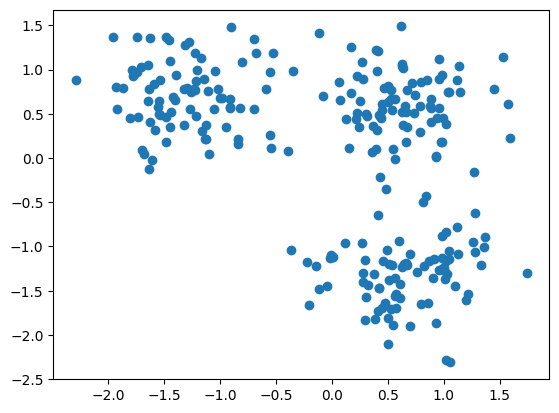

In [12]:
import matplotlib.pyplot as plt

plt.scatter(x[:, 0], x[:, 1])
plt.show

DBSCAN Parameters
1) eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

2) min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.

In [13]:
# One can access the labels assigned by DBSCAN using the labels_ attribute. 
# Noisy samples are given the label math:-1.
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_

# nunmber of clusters in labels, ignoring noise if present
num_clust = len(set(labels)) - (1 if -1 in labels else 0)
num_noise = list(labels).count(-1)

print("Estimated number of clusters: %d" % num_clust)
print("Estimated number of noise points: %d" % num_noise)

Estimated number of clusters: 3
Estimated number of noise points: 44


In [16]:
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:"f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels):.3f}")

Homogeneity: 0.825
Completeness: 0.661
V-measure: 0.734
Adjusted Rand Index: 0.718
Adjusted Mutual Information: 0.731
Silhouette Coefficient: 0.483


Plot

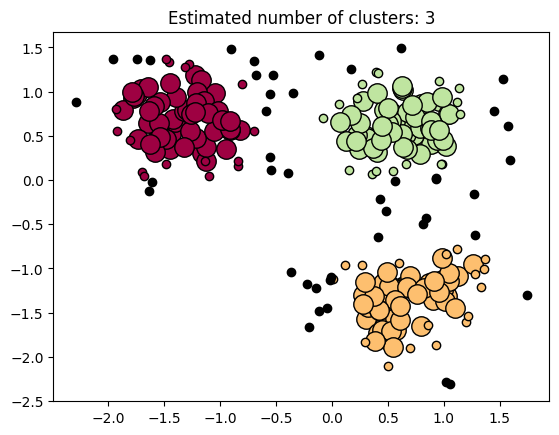

In [15]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {num_clust}")
plt.show()